## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  63.606699  1113.234971  0.083206  4.988750  0.979867
1  73.834104  1098.505107  0.418220  4.809403  1.345209
2  67.720817   696.593695  0.928957  7.065832  1.586545
3  50.188451   341.285658  0.435027  3.350390  1.294450
4  35.534161   637.247695  0.169068  6.479643  1.277542


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9705368	total: 69.6ms	remaining: 1m 9s
1:	learn: 0.9610148	total: 70.1ms	remaining: 35s
2:	learn: 0.9520161	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9435733	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9349721	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9274204	total: 72.6ms	remaining: 12s
6:	learn: 0.9208004	total: 73ms	remaining: 10.4s
7:	learn: 0.9091333	total: 73.6ms	remaining: 9.13s
8:	learn: 0.9002221	total: 74.2ms	remaining: 8.17s
9:	learn: 0.8917541	total: 74.8ms	remaining: 7.4s
10:	learn: 0.8840561	total: 75.2ms	remaining: 6.76s
11:	learn: 0.8729400	total: 75.7ms	remaining: 6.24s
12:	learn: 0.8656625	total: 76.3ms	remaining: 5.79s
13:	learn: 0.8581141	total: 76.7ms	remaining: 5.4s
14:	learn: 0.8491571	total: 77.2ms	remaining: 5.07s
15:	learn: 0.8398875	total: 77.6ms	remaining: 4.78s
16:	learn: 0.8298128	total: 78.1ms	remaining: 4.51s
17:	learn: 0.8232898	total: 78.6ms	remaining: 4.29s
18:	learn: 0.8190818	total: 79ms	remaining: 4.08s
19

88:	learn: 0.4422426	total: 109ms	remaining: 1.12s
89:	learn: 0.4393928	total: 110ms	remaining: 1.11s
90:	learn: 0.4362173	total: 110ms	remaining: 1.1s
91:	learn: 0.4334790	total: 111ms	remaining: 1.09s
92:	learn: 0.4299458	total: 111ms	remaining: 1.08s
93:	learn: 0.4266413	total: 111ms	remaining: 1.07s
94:	learn: 0.4227686	total: 112ms	remaining: 1.06s
95:	learn: 0.4194860	total: 112ms	remaining: 1.05s
96:	learn: 0.4164902	total: 112ms	remaining: 1.05s
97:	learn: 0.4140724	total: 113ms	remaining: 1.04s
98:	learn: 0.4112965	total: 113ms	remaining: 1.03s
99:	learn: 0.4078990	total: 114ms	remaining: 1.02s
100:	learn: 0.4056203	total: 114ms	remaining: 1.02s
101:	learn: 0.4024432	total: 115ms	remaining: 1.01s
102:	learn: 0.4001483	total: 115ms	remaining: 1s
103:	learn: 0.3959935	total: 115ms	remaining: 995ms
104:	learn: 0.3931859	total: 116ms	remaining: 987ms
105:	learn: 0.3906052	total: 116ms	remaining: 980ms
106:	learn: 0.3877793	total: 117ms	remaining: 973ms
107:	learn: 0.3860006	total:

271:	learn: 0.1521728	total: 186ms	remaining: 498ms
272:	learn: 0.1516383	total: 187ms	remaining: 497ms
273:	learn: 0.1508424	total: 187ms	remaining: 496ms
274:	learn: 0.1503327	total: 187ms	remaining: 494ms
275:	learn: 0.1497089	total: 188ms	remaining: 493ms
276:	learn: 0.1490070	total: 188ms	remaining: 491ms
277:	learn: 0.1483369	total: 188ms	remaining: 489ms
278:	learn: 0.1478799	total: 189ms	remaining: 488ms
279:	learn: 0.1469680	total: 189ms	remaining: 487ms
280:	learn: 0.1460617	total: 190ms	remaining: 486ms
281:	learn: 0.1454861	total: 190ms	remaining: 484ms
282:	learn: 0.1450026	total: 191ms	remaining: 483ms
283:	learn: 0.1443538	total: 191ms	remaining: 482ms
284:	learn: 0.1437542	total: 191ms	remaining: 480ms
285:	learn: 0.1431417	total: 192ms	remaining: 479ms
286:	learn: 0.1427097	total: 192ms	remaining: 477ms
287:	learn: 0.1421037	total: 193ms	remaining: 476ms
288:	learn: 0.1415473	total: 193ms	remaining: 475ms
289:	learn: 0.1407654	total: 194ms	remaining: 474ms
290:	learn: 

518:	learn: 0.0662712	total: 290ms	remaining: 269ms
519:	learn: 0.0660982	total: 291ms	remaining: 268ms
520:	learn: 0.0658380	total: 291ms	remaining: 268ms
521:	learn: 0.0655953	total: 292ms	remaining: 267ms
522:	learn: 0.0654211	total: 292ms	remaining: 266ms
523:	learn: 0.0652520	total: 292ms	remaining: 266ms
524:	learn: 0.0651315	total: 293ms	remaining: 265ms
525:	learn: 0.0648950	total: 293ms	remaining: 264ms
526:	learn: 0.0646942	total: 294ms	remaining: 263ms
527:	learn: 0.0644396	total: 294ms	remaining: 263ms
528:	learn: 0.0642731	total: 294ms	remaining: 262ms
529:	learn: 0.0640238	total: 295ms	remaining: 261ms
530:	learn: 0.0638606	total: 295ms	remaining: 261ms
531:	learn: 0.0636164	total: 296ms	remaining: 260ms
532:	learn: 0.0633873	total: 296ms	remaining: 259ms
533:	learn: 0.0632207	total: 297ms	remaining: 259ms
534:	learn: 0.0630270	total: 297ms	remaining: 258ms
535:	learn: 0.0629591	total: 297ms	remaining: 257ms
536:	learn: 0.0627994	total: 298ms	remaining: 257ms
537:	learn: 

701:	learn: 0.0414913	total: 368ms	remaining: 156ms
702:	learn: 0.0413993	total: 368ms	remaining: 155ms
703:	learn: 0.0411991	total: 368ms	remaining: 155ms
704:	learn: 0.0411544	total: 369ms	remaining: 154ms
705:	learn: 0.0410318	total: 369ms	remaining: 154ms
706:	learn: 0.0409868	total: 369ms	remaining: 153ms
707:	learn: 0.0409429	total: 370ms	remaining: 152ms
708:	learn: 0.0408527	total: 370ms	remaining: 152ms
709:	learn: 0.0407400	total: 371ms	remaining: 151ms
710:	learn: 0.0406965	total: 371ms	remaining: 151ms
711:	learn: 0.0405446	total: 371ms	remaining: 150ms
712:	learn: 0.0403788	total: 372ms	remaining: 150ms
713:	learn: 0.0402309	total: 372ms	remaining: 149ms
714:	learn: 0.0401092	total: 372ms	remaining: 148ms
715:	learn: 0.0400294	total: 373ms	remaining: 148ms
716:	learn: 0.0398750	total: 373ms	remaining: 147ms
717:	learn: 0.0397965	total: 374ms	remaining: 147ms
718:	learn: 0.0396354	total: 374ms	remaining: 146ms
719:	learn: 0.0394931	total: 375ms	remaining: 146ms
720:	learn: 

954:	learn: 0.0245549	total: 473ms	remaining: 22.3ms
955:	learn: 0.0245403	total: 473ms	remaining: 21.8ms
956:	learn: 0.0244988	total: 473ms	remaining: 21.3ms
957:	learn: 0.0244678	total: 474ms	remaining: 20.8ms
958:	learn: 0.0244503	total: 474ms	remaining: 20.3ms
959:	learn: 0.0243734	total: 475ms	remaining: 19.8ms
960:	learn: 0.0243314	total: 475ms	remaining: 19.3ms
961:	learn: 0.0243170	total: 475ms	remaining: 18.8ms
962:	learn: 0.0242618	total: 476ms	remaining: 18.3ms
963:	learn: 0.0242320	total: 476ms	remaining: 17.8ms
964:	learn: 0.0242179	total: 477ms	remaining: 17.3ms
965:	learn: 0.0241891	total: 477ms	remaining: 16.8ms
966:	learn: 0.0241752	total: 478ms	remaining: 16.3ms
967:	learn: 0.0241341	total: 478ms	remaining: 15.8ms
968:	learn: 0.0241204	total: 479ms	remaining: 15.3ms
969:	learn: 0.0240487	total: 479ms	remaining: 14.8ms
970:	learn: 0.0240123	total: 479ms	remaining: 14.3ms
971:	learn: 0.0239396	total: 480ms	remaining: 13.8ms
972:	learn: 0.0238403	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

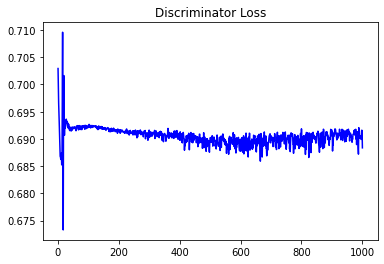

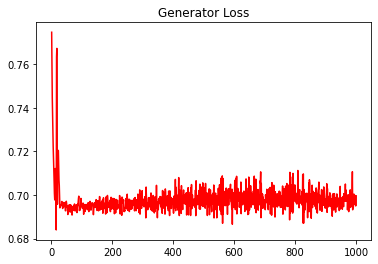

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.32228526255776463


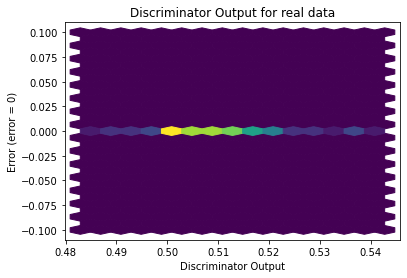

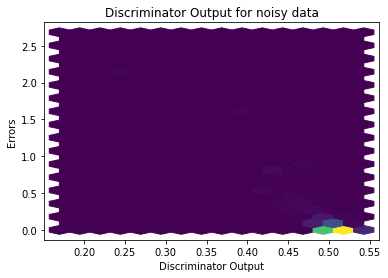

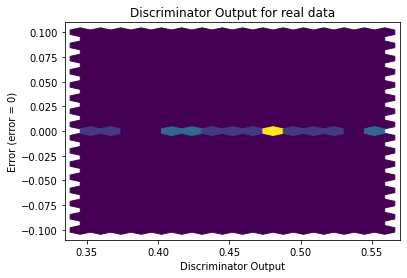

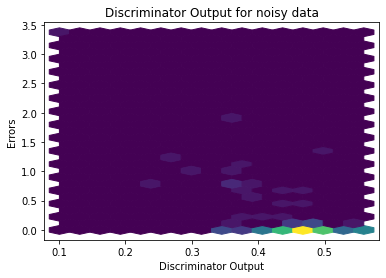

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


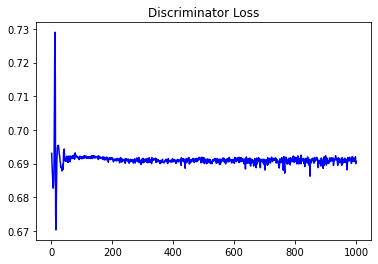

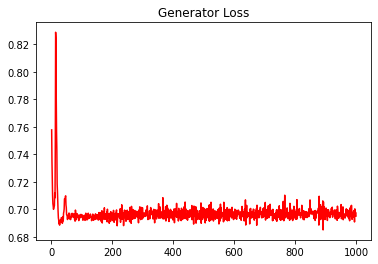

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3652359057743508


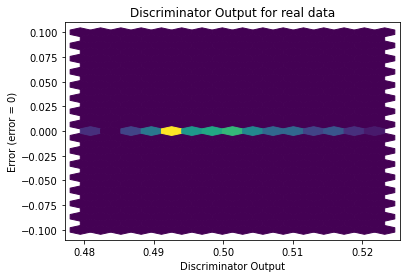

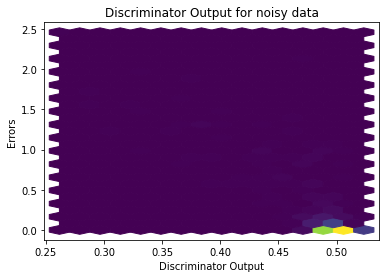

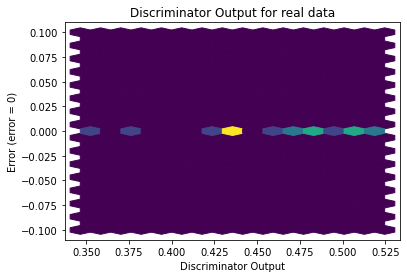

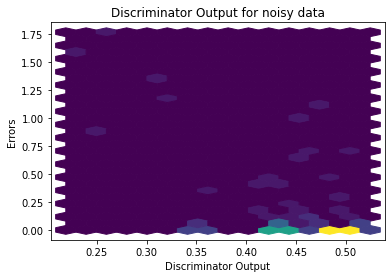

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9814]], requires_grad=True)
